In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!mv "drive/My Drive/dataset.zip" "dataset.zip"


In [6]:
!ls

dataset.zip  drive  sample_data


In [7]:
from zipfile import ZipFile 
  
file_name = "dataset.zip"
  
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 
  
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

Streaming output truncated to the last 5000 lines.
dataset/none/1392.jpg                          2020-05-01 13:49:52         7658
dataset/none/1393.jpg                          2020-05-01 13:49:52         7668
dataset/none/1394.jpg                          2020-05-01 13:49:52         8055
dataset/none/1395.jpg                          2020-05-01 13:49:52         8160
dataset/none/1396.jpg                          2020-05-01 13:49:52         7795
dataset/none/1397.jpg                          2020-05-01 13:49:52         7777
dataset/none/1398.jpg                          2020-05-01 13:49:52         7475
dataset/none/1399.jpg                          2020-05-01 13:49:52         7762
dataset/none/14.jpg                            2020-04-29 23:32:26         9514
dataset/none/140.jpg                           2020-04-29 23:32:32        10917
dataset/none/1400.jpg                          2020-05-01 13:49:52         7708
dataset/none/1401.jpg                          2020-05-01 13:49:52   

In [0]:
import os

labels = ["next","none","pause","prev","start","stop"]

os.mkdir("train")
os.mkdir("test")

for i in range(6):
  train = "train/" + str(labels[i])

  test = "test/" + str(labels[i])

  os.mkdir(train)

  os.mkdir(test)


In [0]:
!ls "train/next/"

In [0]:
import os
import cv2
import shutil

TRAIN_SOURCE = "dataset"

TRAIN_DEST = "train"

TEST_DEST = "test"



for i in range(6):
        
  images_src = os.path.join(TRAIN_SOURCE,str(labels[i]))

  images_dest_train = os.path.join(TRAIN_DEST,str(labels[i]))

  images_dest_test = os.path.join(TEST_DEST,str(labels[i]))

  images = list(os.listdir(images_src))

  images = images[:900]

  tr_images = images[:700]

  te_images = images[700:900]

  for image_path in tr_images:

    image_src = os.path.join(images_src,image_path)

    image_dest = os.path.join(images_dest_train,image_path)

    org_image = cv2.imread(image_src)

    resized_image = cv2.resize(org_image,(250,250),interpolation = cv2.INTER_AREA)

    cv2.imwrite(image_dest,resized_image)


  for image_path in te_images:

    image_src = os.path.join(images_src,image_path)

    image_dest = os.path.join(images_dest_test,image_path)

    org_image = cv2.imread(image_src)

    resized_image = cv2.resize(org_image,(250,250),interpolation = cv2.INTER_AREA)

    cv2.imwrite(image_dest,resized_image)



  





In [11]:
import os

li1 = os.listdir("train/next/")

li2 = os.listdir("test/next/")

print(len(li1))
print(len(li2))

700
200


(250, 250, 3)


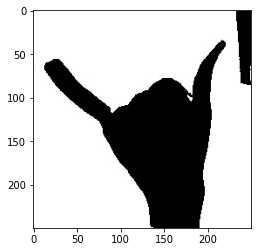

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os


image = mpimg.imread("train/next/434.jpg")

print(image.shape)

imgplot = plt.imshow(image)

imgplot


In [13]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D,Dropout,Conv2D,MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

rows,cols = 250,250

num_classes = 6

model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(250,250,1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

'''
VGG = VGG16(weights='imagenet',include_top=False,input_shape=(rows,cols,3))

for layer in VGG.layers:
    layer.trainable = False

def addtopmodelVGG(bottom_model,num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(256,activation='relu')(top_model)
    top_model = Dense(128,activation='relu')(top_model)
    top_model = Dense(64,activation = 'relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)

    return top_model


model = Model(inputs = VGG.input,outputs = addtopmodelVGG(VGG,num_classes))

'''
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 123, 123, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)            

In [14]:
train_data_dir = 'train/'
validation_data_dir = 'test/'

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64


train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size = (rows,cols),
                        batch_size = batch_size,
                        color_mode="grayscale",
                        class_mode = 'categorical'
                        )

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(rows,cols),
                            batch_size=batch_size,
                            color_mode="grayscale",
                            class_mode='categorical')
#color_mode="grayscale"

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint(
                             'finger_sign_vgg_19.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          restore_best_weights=True,
                          patience=10,
                          verbose=1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

callbacks = [earlystop,checkpoint,learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )

nb_train_samples = 4200
nb_validation_samples = 1200

epochs = 20

history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples//batch_size)

Found 4200 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.
Epoch 1/20
65/65 [==============================] - 30s 459ms/step - loss: 1.2857 - accuracy: 0.4775 - val_loss: 0.6148 - val_accuracy: 0.6727

Epoch 00001: val_loss improved from inf to 0.61484, saving model to finger_sign_vgg_19.h5
Epoch 2/20
65/65 [==============================] - 28s 426ms/step - loss: 0.6197 - accuracy: 0.7773 - val_loss: 0.4178 - val_accuracy: 0.8521

Epoch 00002: val_loss improved from 0.61484 to 0.41778, saving model to finger_sign_vgg_19.h5
Epoch 3/20
65/65 [==============================] - 28s 425ms/step - loss: 0.4850 - accuracy: 0.8206 - val_loss: 0.3232 - val_accuracy: 0.8732

Epoch 00003: val_loss improved from 0.41778 to 0.32318, saving model to finger_sign_vgg_19.h5
Epoch 4/20
65/65 [==============================] - 27s 420ms/step - loss: 0.3700 - accuracy: 0.8680 - val_loss: 0.1723 - val_accuracy: 0.9349

Epoch 00004: val_loss improved from 0.32318 to 0.17229, saving

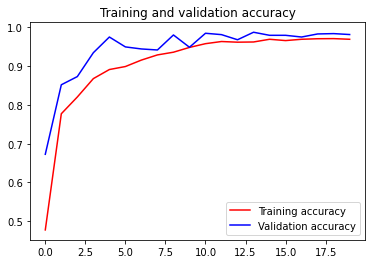

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
labels = ["next","none","pause","prev","start","stop"]

In [17]:
from google.colab import files

uploaded = files.upload()

Saving test1.jfif to test1.jfif


In [18]:
!ls

dataset      drive		    sample_data  test1.jfif
dataset.zip  finger_sign_vgg_19.h5  test	 train


stop


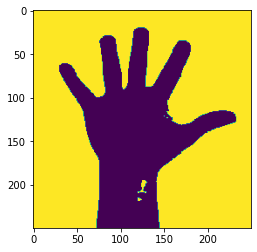

In [20]:
import numpy as np
from keras_preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

#model = load_model('model1.h5')

path = "test1.jfif"

org_image = cv2.imread(path)


resized_image = cv2.resize(org_image,(250,250),interpolation = cv2.INTER_AREA)

image_grey = cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)

image_grey_final = cv2.threshold(image_grey,90,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]

x = image.img_to_array(image_grey_final)

x = x.reshape((1,250,250,1))

classes = model.predict(x)

label = labels[np.argmax(classes)]

print(label)

imgplot = plt.imshow(image_grey_final)

imgplot


In [0]:
model.save('gesture_model.h5')

In [23]:
!ls

dataset      drive	       sample_data  test1.jfif
dataset.zip  gesture_model.h5  test	    train


In [0]:
!mv "gesture_model.h5" "/content/drive/My Drive/gesture_model.h5"

In [0]:
!mv "finger_sign_vgg_19.h5" "/content/drive/My Drive/finger_sign_vgg_19.h5"